## Problem Statement

Given a review, find the probability of it being a positive review or a negative review using deep neural networks.

In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install tensorflow

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalMaxPooling1D


max_words = 10000


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)


max_sequence_length = 500
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)


model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# The purpose of using an Embedding layer in natural language processing tasks is 
# to capture the semantic relationships between words and represent them in a meaningful and compact vector space, 
# allowing the subsequent layers of the model to learn from this representation and make accurate predictions.


# GlobalMaxPooling1D layer acts as a dimensionality reduction step 
# and provides a global view of the input sequence, enabling the model 
# to capture the most significant features and achieve efficient and effective text classification.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Generate predictions


ImportError: cannot import name 'keras' from 'tensorflow' (unknown location)

782/782 [==============================] - 1s 1ms/step


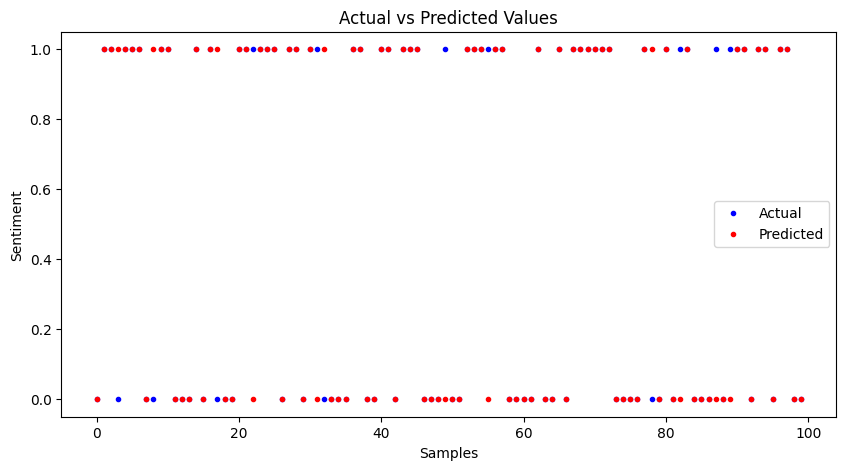

782/782 [==============================] - 1s 1ms/step - loss: 0.6263 - accuracy: 0.8656
Test Loss: 0.626289963722229
Test Accuracy: 0.8656399846076965


In [48]:
# Generate predictions
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Plot predicted vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], 'b.', label='Actual')
plt.plot(y_pred[:100], 'r.', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Sentiment')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [7]:
# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_rep)

NameError: name 'y_test' is not defined